In [111]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
  accuracy_score,
  confusion_matrix,
  ConfusionMatrixDisplay,
  f1_score,
  recall_score,
  precision_score
)

data=pd.read_csv('spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [112]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [113]:
pipeline=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [114]:
data['Spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)
data = data.drop(columns=['Category'])
data

,Message,Spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


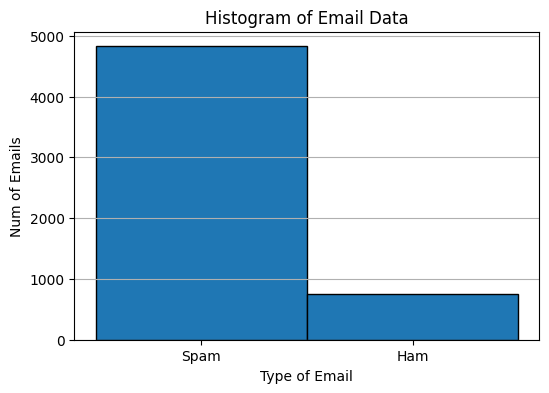

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(data['Spam'], bins=[-0.5, 0.5, 1.5], edgecolor='black', align='mid')
plt.xticks([0, 1], labels=["Spam", "Ham"]) 
plt.xlabel('Type of Email')
plt.ylabel('Num of Emails')
plt.title('Histogram of Email Data')
plt.grid(axis='y')
plt.show()

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(data.Message, data.Spam, test_size=0.15)

In [117]:
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [118]:
y_pred = pipeline.predict(X_test)

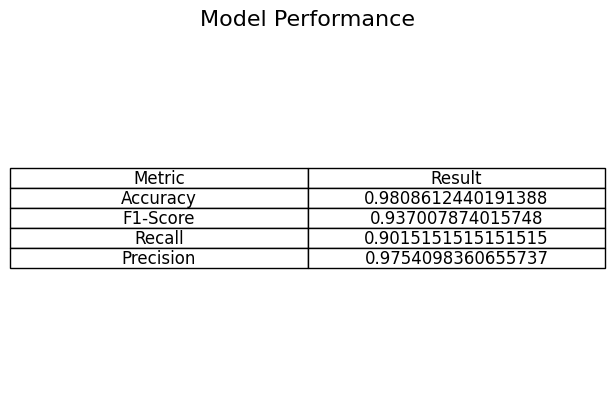

In [132]:
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)

fig, ax = plt.subplots()

ax.axis('off')
table = ax.table(cellText=np.array([["Accuracy", "F1-Score", "Recall", "Precision"], [accuracy, f1, recall, precision]]).T,
  colLabels=["Metric", "Result"], cellLoc='center', 
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title('Model Performance', fontsize=16)
plt.show()

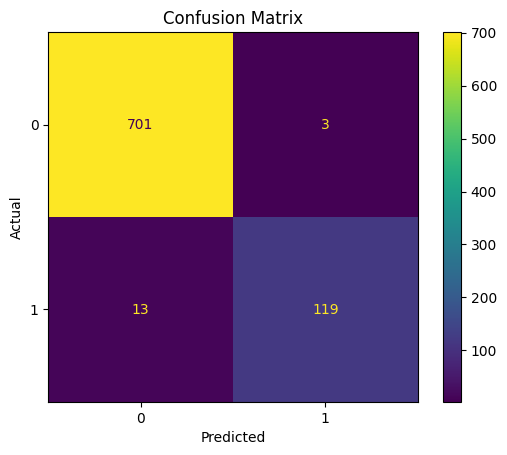

In [120]:
cm = confusion_matrix(Y_test, y_pred)

cmDisplay = ConfusionMatrixDisplay(cm)
cmDisplay.plot()
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Insert the email you want to test here

In [150]:
email = '''
Subject: Congratulations! You've Won a $1,000 Gift Card!

Dear Valued Customer,

We are thrilled to inform you that you have been selected as the Grand Prize Winner of our exclusive giveaway! You have won a $1,000 gift card to your favorite store!

To claim your prize, simply click the link below and fill out the required information. Don’t miss this incredible opportunity—act fast, as this offer is only available for a limited time!

Claim Your Prize Now!

As a bonus, if you refer a friend, you’ll both receive an additional $100 gift card!

Thank you for being a loyal customer. We look forward to celebrating your win!

Best regards,

The Giveaway Team
support@giveaway.com
          '''

# This will test your email against the model and tell you whether the email is spam or ham

In [152]:
result = pipeline.predict([email])

spam_or_ham = "Spam" if result == 1 else "Ham" 
print("The email inputted was " + spam_or_ham)

The email inputted was Spam
